## Pytorch WorkFlow


In [1]:
what_were_covering = {1: "data preparation",
                      2: "build model",
                      3: "fitting the model to the data",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loading a model",
                      6: "putting all together"}
what_were_covering

{1: 'data preparation',
 2: 'build model',
 3: 'fitting the model to the data',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting all together'}

In [2]:
import torch
import numpy as np
from torch import nn # contains all building blocks for neural networks
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

* VIdeo
* Audio
* Text
etc..

In [3]:
# Using linear regression as example
# Create parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Spliting data into training and test sets

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

##  how might we better visualize our data

this is where data exploratory comes in


In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="y", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

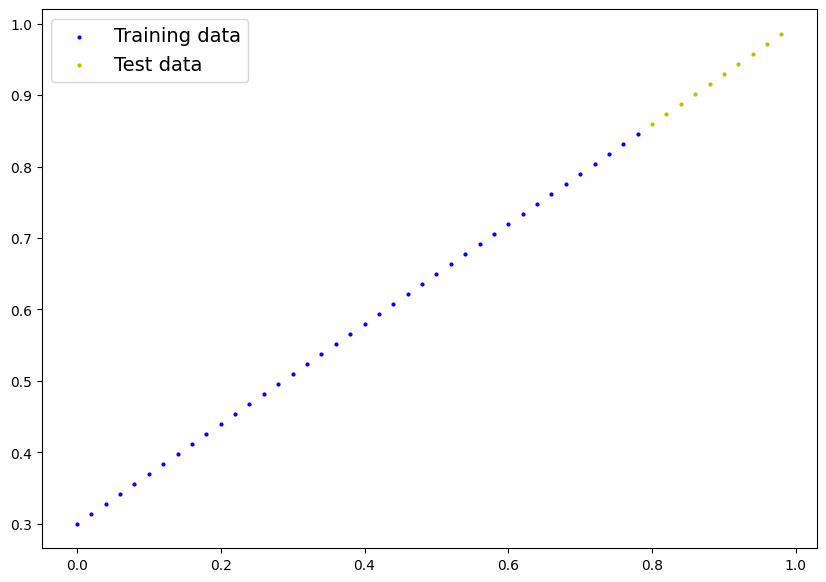

In [6]:
plot_predictions()

## Build model


In [7]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inhertis como nn.Module, base class for neural networks
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,                  # start with random value and adjust the ideal parameter
                                           requires_grad=True,
                                           dtype=torch.float32)) # randn is for generating values with mean = 0 and deviation = 1
    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float32))

    # Forward method computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # this is the linear regression formula




## Pytorch model building essentials

* torch.nn   -> contains buildings
* torch.nn.Parameters  -> Parameters of the model, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module -> base class for all neural network modulos, if you subclass ir, you should overwrite forward()
* torch.optimizer -> this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses needs to overwrite

## Checking the content of our Pytorch model



In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

# Show parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# See the parameters names
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predicionts using "torch.inference_mode()"

In [10]:
# Make predicionts
with torch.inference_mode(): # save memory, not track the gradients, dont needed in test, inference faster! use this for test, not train
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

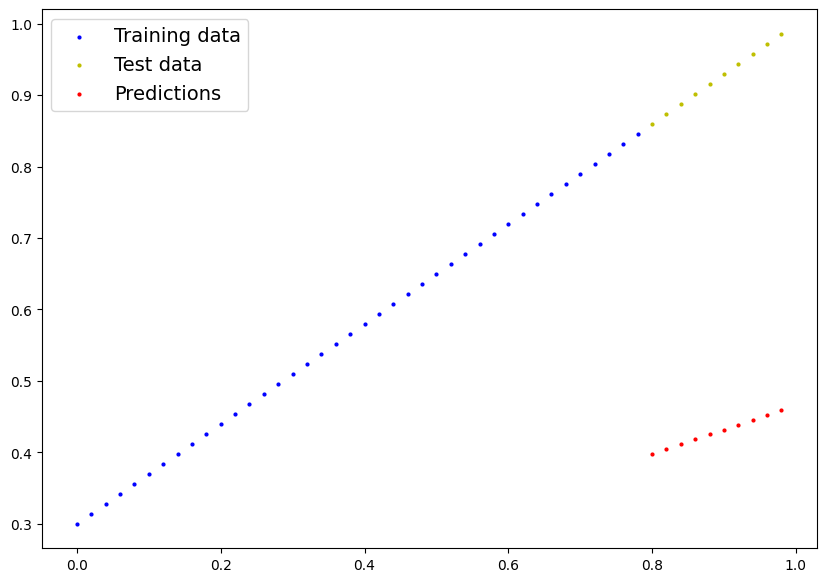

In [11]:
plot_predictions(predictions=y_preds)

## Training model

* **Loss Function**
* **Optmizer**

In [12]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup a optimizer
optimizer = torch.optim.SGD(model_0.parameters(),    # stochastic gradient descent
                            lr=0.01) # learning rate is a hyperparameter, very important

## Building training loop

In [13]:
torch.manual_seed(42)

epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in pytorch set, enable gradient tracking


  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero the optimizer gradientes, they accumulate every epoch, zero them to start fresh each forward pass
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default will acumulate trough the loop, to not do that do step 3

  # Testing
  model_0.eval() # Tell the model we want to evaluate rather than train
  with torch.inference_mode():  # turns off gradient tracking and couple more things behind the scenes

    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}, Loss: {loss}, Test loss: {test_loss}")

Epoch: 0, Loss: 0.31288138031959534, Test loss: 0.48106518387794495
Epoch: 10, Loss: 0.1976713240146637, Test loss: 0.3463551998138428
Epoch: 20, Loss: 0.08908725529909134, Test loss: 0.21729660034179688
Epoch: 30, Loss: 0.053148526698350906, Test loss: 0.14464017748832703
Epoch: 40, Loss: 0.04543796554207802, Test loss: 0.11360953003168106
Epoch: 50, Loss: 0.04167863354086876, Test loss: 0.09919948130846024
Epoch: 60, Loss: 0.03818932920694351, Test loss: 0.08886633068323135
Epoch: 70, Loss: 0.03476089984178543, Test loss: 0.0805937647819519
Epoch: 80, Loss: 0.03132382780313492, Test loss: 0.07232122868299484
Epoch: 90, Loss: 0.02788739837706089, Test loss: 0.06473556160926819


# How the loop works:

0. Loop trough the data
1. Forward pass
2. calculate the loss
3. optimizer zero grad
4. Loss backward
5. Optimizer step

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [15]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

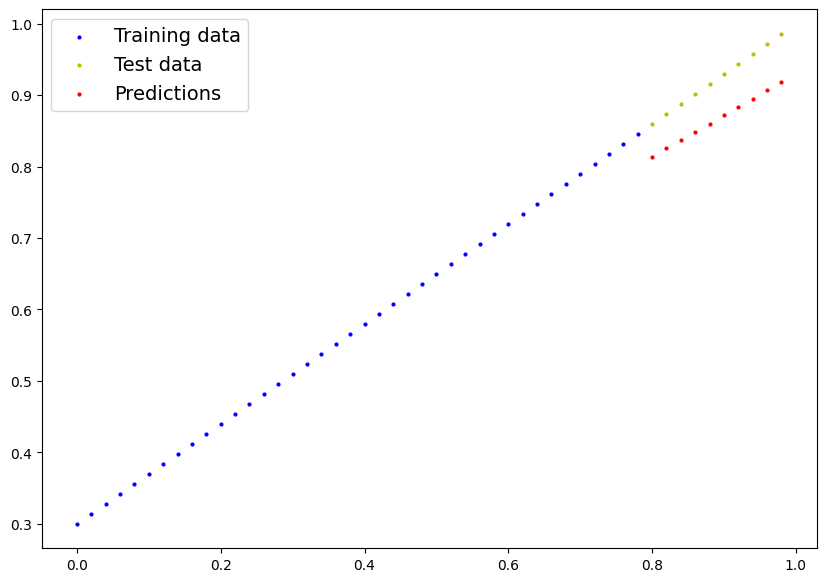

In [16]:
plot_predictions(predictions=y_preds_new)

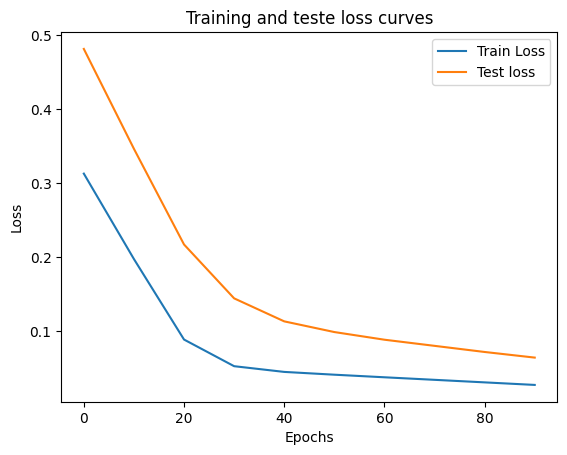

In [17]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and teste loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in Pytorch

There are three main methods you should be aware

* `torch.save()` - allows you save a Pytorch object in Python's pickel format
* `torch.load()` allows you load a saved Pytoech object
* `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [19]:
# Saving a model
from pathlib import Path

# 1. Create a modelo directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [20]:
# list models
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr 22 12:57 01_pytorch_workflow_model_0.pth


## Loading a model in Pytorch

In [21]:
# TO load in saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [23]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

# Puting all together!

Create device-agnostic-code.

This means if we've got acess to a GPU, our code will use it(for more fast code)

If no GPU is available, the code will use default CPU

In [24]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device = {device}")

Using device = cuda


### Data

In [25]:
# Create some data using the linear regression formula usind y = w * x + b
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (feature and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [26]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

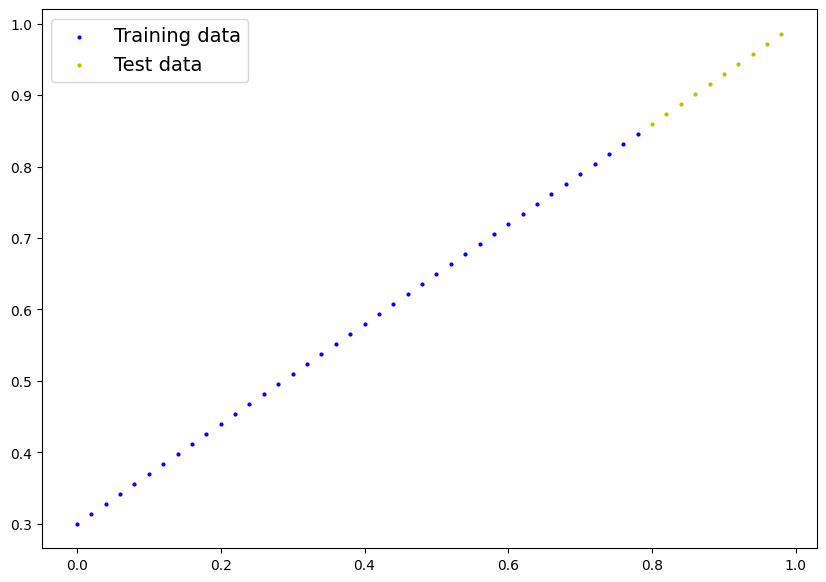

In [27]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### Building a model

In [33]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [35]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [36]:
# Set he model to use the target device, if you have a GPU
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training code

* Loss function
* Optimizer
* Training Loop
* Test loop

In [39]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [44]:
# Lets write a training loop
torch.manual_seed(42)

# Put data on targer device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Training loop
epochs = 200

for epoch in range(epochs):
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)

  # Loss
  loss = loss_fn(y_pred, y_train)

  # Optmizer zero grad
  optimizer.zero_grad()

  # backward propagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    loss_test = loss_fn(test_pred, y_test)

    # Print out whats happening
    if epoch % 10:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {loss_test}")

Epoch: 1 | Loss: 0.5321359634399414 | Test loss: 0.5470342636108398
Epoch: 2 | Loss: 0.5206149816513062 | Test loss: 0.5335632562637329
Epoch: 3 | Loss: 0.5090939998626709 | Test loss: 0.5200923085212708
Epoch: 4 | Loss: 0.49757298827171326 | Test loss: 0.5066213011741638
Epoch: 5 | Loss: 0.4860520362854004 | Test loss: 0.4931503236293793
Epoch: 6 | Loss: 0.47453102469444275 | Test loss: 0.4796793460845947
Epoch: 7 | Loss: 0.4630100429058075 | Test loss: 0.4662083685398102
Epoch: 8 | Loss: 0.45148906111717224 | Test loss: 0.45273739099502563
Epoch: 9 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 11 | Loss: 0.4169261157512665 | Test loss: 0.4123244285583496
Epoch: 12 | Loss: 0.4054051339626312 | Test loss: 0.39885345101356506
Epoch: 13 | Loss: 0.3938841223716736 | Test loss: 0.3853824734687805
Epoch: 14 | Loss: 0.38236314058303833 | Test loss: 0.37191149592399597
Epoch: 15 | Loss: 0.3708421289920807 | Test loss: 0.35844048857688904
Epoch: 16 | Loss: 0.3593211174011230

In [45]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

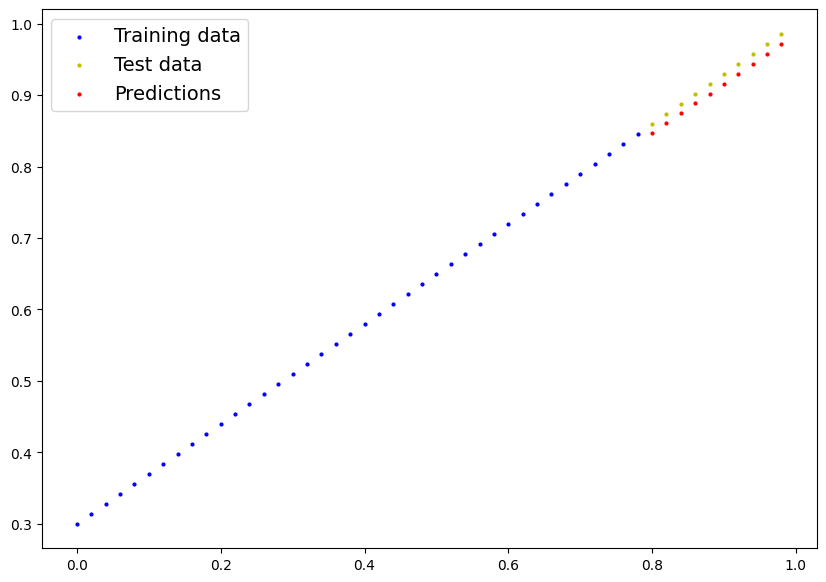

In [48]:
plot_predictions(predictions=test_pred.cpu())